In [1]:
using StatsPlots, Statistics, Distributions

In [2]:
function generate_midpoints(n_bins)
    quantiles = Array{Float64}(undef, n_bins)
    quantile_midpoints = Array{Float64}(undef, n_bins)

    #generate the quantile midpoints
    for i = 1:n_bins
        quantiles[i] = i/n_bins
        quantile_midpoints[i] = i/n_bins - (1/2)*(1/n_bins)
    end

    return vec(quantiles), vec(quantile_midpoints)
end

generate_midpoints (generic function with 1 method)

In [3]:
function add_distributions(list1, list2)
    sum_list = Array{Float64}(undef, length(list1)^2)
    
    list1 = repeat(list1, length(list1))
    list1 = sort(list1)
    list2 = repeat(list2, length(list2))
    
    for i in eachindex(sum_list)
        sum_list[i] = list1[i] + list2[i]
    end
    
    return vec(sort(sum_list))
end

add_distributions (generic function with 1 method)

In [4]:
function re_bin(distribution, n_bins)
    rebinned = reshape(distribution, n_bins, n_bins)
    rebinned = mean(rebinned, dims = 1)
    
    return vec(rebinned)
end

re_bin (generic function with 1 method)

In [5]:
function calculate_mean(RV, n_bins)
    return sum(RV .* 1/n_bins)
end

calculate_mean (generic function with 1 method)

In [6]:
function calculate_variance(RV, calculated_mean, n_bins)
    return sum(RV.^2 * (1/n_bins)) - calculated_mean^2
end

calculate_variance (generic function with 1 method)

In [12]:
# Gamma distribution with parameters α and θ. 
# Mean = α*θ
# Variance = α*θ^2

n_bins = 50
n_RVs = 100
alpha_sum = 0

# α = 4
θ = 0.5

RV_list = Array{Distribution}(undef, n_RVs)

for i = 1:n_RVs
    α = rand(1:5)
    alpha_sum = alpha_sum + α
    
    temp_RV = Gamma(α, θ)
    RV_list[i] = temp_RV
end

In [13]:
quantiles, quantile_midpoints = generate_midpoints(n_bins)

final_RV = pop!(RV_list)
final_RV = quantile.(final_RV, quantile_midpoints)

for RV in RV_list
    temp_list = quantile.(RV, quantile_midpoints)
    
    final_RV = add_distributions(temp_list, final_RV)
    final_RV = re_bin(final_RV, n_bins) 
end

In [14]:
println("Expected average: ", alpha_sum * θ)
println("Expected variance: ", alpha_sum * θ^2)

empirical_mean = calculate_mean(final_RV, n_bins)
empirical_variance = calculate_variance(final_RV, empirical_mean, n_bins)

println("Computed average: ",empirical_mean)
println("Computed variance: ", empirical_variance)

Expected average: 165.5
Expected variance: 82.75
Computed average: 165.11378784116175
Computed variance: 74.27603637334323


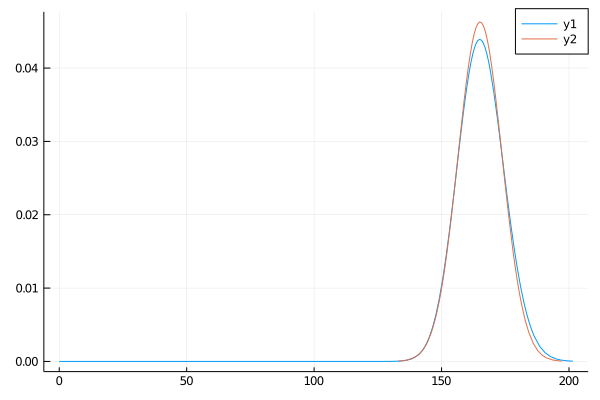

In [15]:
plot(Gamma(alpha_sum, θ))
plot!(Normal(empirical_mean, empirical_variance^0.5))